## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 100
BATCH_SIZE = 256
MOMENTUM = 0.95

In [12]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)          

196/196 [==============================] - 4s 19ms/step - loss: 1.4924 - accuracy: 0.4861 - val_loss: 1.6533 - val_accuracy: 0.4301
Epoch 49/100
196/196 [==============================] - 4s 23ms/step - loss: 1.4987 - accuracy: 0.4804 - val_loss: 1.6420 - val_accuracy: 0.4451
Epoch 50/100
196/196 [==============================] - 4s 20ms/step - loss: 1.4879 - accuracy: 0.4849 - val_loss: 1.6704 - val_accuracy: 0.4292
Epoch 51/100
196/196 [==============================] - 4s 21ms/step - loss: 1.4747 - accuracy: 0.4924 - val_loss: 1.6395 - val_accuracy: 0.4493
Epoch 52/100
196/196 [==============================] - 4s 22ms/step - loss: 1.4896 - accuracy: 0.4879 - val_loss: 1.6676 - val_accuracy: 0.4301
Epoch 53/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4790 - accuracy: 0.4902 - val_loss: 1.6863 - val_accuracy: 0.4343
Epoch 54/100
196/196 [==============================] - 4s 21ms/step - loss: 1.4973 - accuracy: 0.4882 - val_loss: 1.6355 - val_accuracy: 0.447

Epoch 1/100
196/196 [==============================] - 5s 28ms/step - loss: 1.8902 - accuracy: 0.3162 - val_loss: 1.6572 - val_accuracy: 0.4135
Epoch 2/100
196/196 [==============================] - 3s 17ms/step - loss: 1.6319 - accuracy: 0.4183 - val_loss: 1.5698 - val_accuracy: 0.4427
Epoch 3/100
196/196 [==============================] - 4s 18ms/step - loss: 1.5371 - accuracy: 0.4528 - val_loss: 1.5249 - val_accuracy: 0.4584
Epoch 4/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4772 - accuracy: 0.4728 - val_loss: 1.5363 - val_accuracy: 0.4565
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4294 - accuracy: 0.4900 - val_loss: 1.5044 - val_accuracy: 0.4683
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.3886 - accuracy: 0.5026 - val_loss: 1.5581 - val_accuracy: 0.4510
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 1.3652 - accuracy: 0.5133 - val_loss: 1.4585 - val_accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 0.4760 - accuracy: 0.8285 - val_loss: 2.1497 - val_accuracy: 0.5218
Epoch 58/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4692 - accuracy: 0.8302 - val_loss: 2.1795 - val_accuracy: 0.5145
Epoch 59/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4568 - accuracy: 0.8358 - val_loss: 2.1604 - val_accuracy: 0.5106
Epoch 60/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4649 - accuracy: 0.8326 - val_loss: 2.1419 - val_accuracy: 0.5111
Epoch 61/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4479 - accuracy: 0.8374 - val_loss: 2.2138 - val_accuracy: 0.5038
Epoch 62/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4380 - accuracy: 0.8435 - val_loss: 2.3048 - val_accuracy: 0.5256
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 0.4223 - accuracy: 0.8465 - val_loss: 2.4010 - val_accuracy: 0.505

196/196 [==============================] - 4s 19ms/step - loss: 1.6847 - accuracy: 0.4000 - val_loss: 1.6608 - val_accuracy: 0.4049
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.6293 - accuracy: 0.4183 - val_loss: 1.6095 - val_accuracy: 0.4248
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5843 - accuracy: 0.4363 - val_loss: 1.6183 - val_accuracy: 0.4286
Epoch 7/100
196/196 [==============================] - 4s 22ms/step - loss: 1.5447 - accuracy: 0.4508 - val_loss: 1.5732 - val_accuracy: 0.4374
Epoch 8/100
196/196 [==============================] - 5s 24ms/step - loss: 1.5071 - accuracy: 0.4637 - val_loss: 1.5138 - val_accuracy: 0.4619
Epoch 9/100
196/196 [==============================] - 4s 23ms/step - loss: 1.4735 - accuracy: 0.4767 - val_loss: 1.4942 - val_accuracy: 0.4679
Epoch 10/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4423 - accuracy: 0.4872 - val_loss: 1.5074 - val_accuracy: 0.4559
Epo

196/196 [==============================] - 4s 20ms/step - loss: 0.6789 - accuracy: 0.7548 - val_loss: 1.6048 - val_accuracy: 0.5213
Epoch 61/100
196/196 [==============================] - 4s 20ms/step - loss: 0.6604 - accuracy: 0.7644 - val_loss: 1.7264 - val_accuracy: 0.5096
Epoch 62/100
196/196 [==============================] - 4s 21ms/step - loss: 0.6447 - accuracy: 0.7694 - val_loss: 1.6737 - val_accuracy: 0.5113
Epoch 63/100
196/196 [==============================] - 4s 20ms/step - loss: 0.6333 - accuracy: 0.7742 - val_loss: 1.8608 - val_accuracy: 0.4806
Epoch 64/100
196/196 [==============================] - 4s 20ms/step - loss: 0.6263 - accuracy: 0.7751 - val_loss: 1.7386 - val_accuracy: 0.5154
Epoch 65/100
196/196 [==============================] - 4s 21ms/step - loss: 0.6099 - accuracy: 0.7808 - val_loss: 1.6777 - val_accuracy: 0.5276
Epoch 66/100
196/196 [==============================] - 4s 20ms/step - loss: 0.5853 - accuracy: 0.7914 - val_loss: 1.8654 - val_accuracy: 0.495

196/196 [==============================] - 4s 20ms/step - loss: 2.0182 - accuracy: 0.2965 - val_loss: 1.9957 - val_accuracy: 0.2997
Epoch 8/100
196/196 [==============================] - 4s 20ms/step - loss: 1.9802 - accuracy: 0.3076 - val_loss: 1.9633 - val_accuracy: 0.3116
Epoch 9/100
196/196 [==============================] - 4s 20ms/step - loss: 1.9508 - accuracy: 0.3112 - val_loss: 1.9372 - val_accuracy: 0.3142
Epoch 10/100
196/196 [==============================] - 4s 20ms/step - loss: 1.9265 - accuracy: 0.3198 - val_loss: 1.9144 - val_accuracy: 0.3264
Epoch 11/100
196/196 [==============================] - 4s 20ms/step - loss: 1.9053 - accuracy: 0.3274 - val_loss: 1.8951 - val_accuracy: 0.3264
Epoch 12/100
196/196 [==============================] - 4s 20ms/step - loss: 1.8868 - accuracy: 0.3323 - val_loss: 1.8775 - val_accuracy: 0.3346
Epoch 13/100
196/196 [==============================] - 4s 20ms/step - loss: 1.8699 - accuracy: 0.3399 - val_loss: 1.8621 - val_accuracy: 0.3401


196/196 [==============================] - 4s 20ms/step - loss: 1.4960 - accuracy: 0.4682 - val_loss: 1.5130 - val_accuracy: 0.4631
Epoch 64/100
196/196 [==============================] - 4s 20ms/step - loss: 1.4906 - accuracy: 0.4713 - val_loss: 1.5117 - val_accuracy: 0.4619
Epoch 65/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4865 - accuracy: 0.4721 - val_loss: 1.5060 - val_accuracy: 0.4653
Epoch 66/100
196/196 [==============================] - 4s 20ms/step - loss: 1.4816 - accuracy: 0.4746 - val_loss: 1.5100 - val_accuracy: 0.4649
Epoch 67/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4769 - accuracy: 0.4753 - val_loss: 1.5033 - val_accuracy: 0.4679
Epoch 68/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4732 - accuracy: 0.4781 - val_loss: 1.5004 - val_accuracy: 0.4679
Epoch 69/100
196/196 [==============================] - 4s 20ms/step - loss: 1.4685 - accuracy: 0.4794 - val_loss: 1.4997 - val_accuracy: 0.464

196/196 [==============================] - 4s 19ms/step - loss: 2.2614 - accuracy: 0.1453 - val_loss: 2.2584 - val_accuracy: 0.1506
Epoch 11/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2561 - accuracy: 0.1522 - val_loss: 2.2533 - val_accuracy: 0.1561
Epoch 12/100
196/196 [==============================] - 4s 21ms/step - loss: 2.2507 - accuracy: 0.1590 - val_loss: 2.2479 - val_accuracy: 0.1621
Epoch 13/100
196/196 [==============================] - 4s 20ms/step - loss: 2.2452 - accuracy: 0.1652 - val_loss: 2.2423 - val_accuracy: 0.1678
Epoch 14/100
196/196 [==============================] - 4s 20ms/step - loss: 2.2394 - accuracy: 0.1704 - val_loss: 2.2366 - val_accuracy: 0.1703
Epoch 15/100
196/196 [==============================] - 4s 20ms/step - loss: 2.2334 - accuracy: 0.1738 - val_loss: 2.2307 - val_accuracy: 0.1748
Epoch 16/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2274 - accuracy: 0.1792 - val_loss: 2.2247 - val_accuracy: 0.179

196/196 [==============================] - 5s 24ms/step - loss: 1.9378 - accuracy: 0.3104 - val_loss: 1.9388 - val_accuracy: 0.3131
Epoch 67/100
196/196 [==============================] - 4s 21ms/step - loss: 1.9345 - accuracy: 0.3121 - val_loss: 1.9355 - val_accuracy: 0.3123
Epoch 68/100
196/196 [==============================] - 4s 22ms/step - loss: 1.9312 - accuracy: 0.3129 - val_loss: 1.9323 - val_accuracy: 0.3148
Epoch 69/100
196/196 [==============================] - 4s 21ms/step - loss: 1.9282 - accuracy: 0.3134 - val_loss: 1.9294 - val_accuracy: 0.3170
Epoch 70/100
196/196 [==============================] - 4s 21ms/step - loss: 1.9251 - accuracy: 0.3162 - val_loss: 1.9263 - val_accuracy: 0.3148
Epoch 71/100
196/196 [==============================] - 4s 19ms/step - loss: 1.9221 - accuracy: 0.3169 - val_loss: 1.9234 - val_accuracy: 0.3176
Epoch 72/100
196/196 [==============================] - 4s 19ms/step - loss: 1.9192 - accuracy: 0.3186 - val_loss: 1.9205 - val_accuracy: 0.319

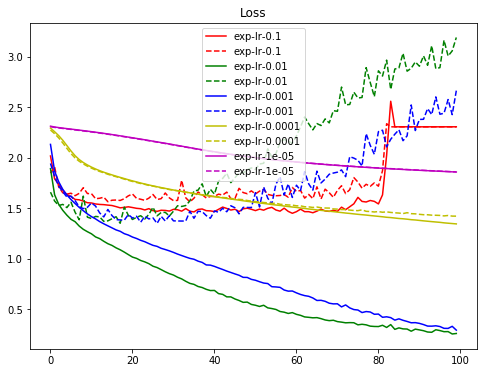

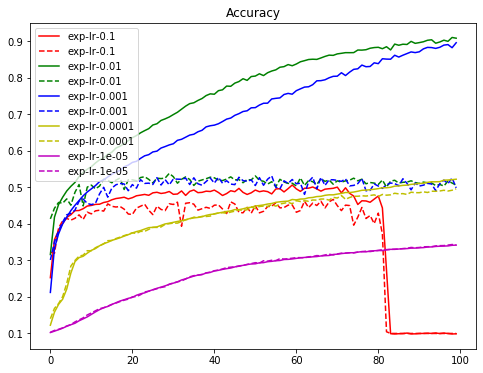

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [14]:
MOMENTUM = 0.65

In [15]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)          

196/196 [==============================] - 4s 20ms/step - loss: 0.8582 - accuracy: 0.6888 - val_loss: 1.8060 - val_accuracy: 0.4649
Epoch 49/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8424 - accuracy: 0.6961 - val_loss: 1.8509 - val_accuracy: 0.4661
Epoch 50/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8393 - accuracy: 0.6982 - val_loss: 1.7084 - val_accuracy: 0.4796
Epoch 51/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8183 - accuracy: 0.7022 - val_loss: 2.2264 - val_accuracy: 0.4433
Epoch 52/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8212 - accuracy: 0.7036 - val_loss: 1.8002 - val_accuracy: 0.4794
Epoch 53/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8120 - accuracy: 0.7043 - val_loss: 1.6903 - val_accuracy: 0.5127
Epoch 54/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8057 - accuracy: 0.7083 - val_loss: 1.8899 - val_accuracy: 0.462

Epoch 1/100
196/196 [==============================] - 4s 20ms/step - loss: 2.0638 - accuracy: 0.2517 - val_loss: 1.9358 - val_accuracy: 0.3050
Epoch 2/100
196/196 [==============================] - 4s 18ms/step - loss: 1.8382 - accuracy: 0.3444 - val_loss: 1.9813 - val_accuracy: 0.3006
Epoch 3/100
196/196 [==============================] - 4s 18ms/step - loss: 1.7512 - accuracy: 0.3778 - val_loss: 1.7375 - val_accuracy: 0.3688
Epoch 4/100
196/196 [==============================] - 4s 19ms/step - loss: 1.6881 - accuracy: 0.4006 - val_loss: 1.7891 - val_accuracy: 0.3688
Epoch 5/100
196/196 [==============================] - 4s 18ms/step - loss: 1.6403 - accuracy: 0.4183 - val_loss: 1.6224 - val_accuracy: 0.4180
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5978 - accuracy: 0.4350 - val_loss: 1.5821 - val_accuracy: 0.4290
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5596 - accuracy: 0.4459 - val_loss: 1.7506 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 0.8176 - accuracy: 0.7104 - val_loss: 1.6103 - val_accuracy: 0.5180
Epoch 58/100
196/196 [==============================] - 4s 18ms/step - loss: 0.7987 - accuracy: 0.7154 - val_loss: 1.6766 - val_accuracy: 0.4982
Epoch 59/100
196/196 [==============================] - 4s 18ms/step - loss: 0.7895 - accuracy: 0.7198 - val_loss: 1.5700 - val_accuracy: 0.5071
Epoch 60/100
196/196 [==============================] - 4s 18ms/step - loss: 0.7715 - accuracy: 0.7258 - val_loss: 1.6241 - val_accuracy: 0.5029
Epoch 61/100
196/196 [==============================] - 4s 18ms/step - loss: 0.7729 - accuracy: 0.7277 - val_loss: 1.6519 - val_accuracy: 0.5087
Epoch 62/100
196/196 [==============================] - 4s 18ms/step - loss: 0.7562 - accuracy: 0.7327 - val_loss: 1.6382 - val_accuracy: 0.4931
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 0.7469 - accuracy: 0.7349 - val_loss: 1.6502 - val_accuracy: 0.497

196/196 [==============================] - 4s 19ms/step - loss: 2.0438 - accuracy: 0.2648 - val_loss: 2.0139 - val_accuracy: 0.2738
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.9868 - accuracy: 0.2810 - val_loss: 1.9640 - val_accuracy: 0.2826
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.9430 - accuracy: 0.2937 - val_loss: 1.9267 - val_accuracy: 0.3064
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 1.9105 - accuracy: 0.3101 - val_loss: 1.9003 - val_accuracy: 0.3174
Epoch 8/100
196/196 [==============================] - 4s 18ms/step - loss: 1.8835 - accuracy: 0.3257 - val_loss: 1.8701 - val_accuracy: 0.3304
Epoch 9/100
196/196 [==============================] - 4s 18ms/step - loss: 1.8603 - accuracy: 0.3378 - val_loss: 1.8617 - val_accuracy: 0.3391
Epoch 10/100
196/196 [==============================] - 4s 19ms/step - loss: 1.8391 - accuracy: 0.3479 - val_loss: 1.8304 - val_accuracy: 0.3468
Epo

196/196 [==============================] - 4s 19ms/step - loss: 1.4134 - accuracy: 0.4967 - val_loss: 1.5588 - val_accuracy: 0.4495
Epoch 61/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4078 - accuracy: 0.4976 - val_loss: 1.4609 - val_accuracy: 0.4825
Epoch 62/100
196/196 [==============================] - 4s 18ms/step - loss: 1.4054 - accuracy: 0.4979 - val_loss: 1.4444 - val_accuracy: 0.4871
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 1.4012 - accuracy: 0.5001 - val_loss: 1.4960 - val_accuracy: 0.4629
Epoch 64/100
196/196 [==============================] - 4s 19ms/step - loss: 1.3941 - accuracy: 0.5027 - val_loss: 1.5239 - val_accuracy: 0.4584
Epoch 65/100
196/196 [==============================] - 4s 18ms/step - loss: 1.3883 - accuracy: 0.5028 - val_loss: 1.4717 - val_accuracy: 0.4731
Epoch 66/100
196/196 [==============================] - 4s 19ms/step - loss: 1.3833 - accuracy: 0.5088 - val_loss: 1.4622 - val_accuracy: 0.481

196/196 [==============================] - 4s 18ms/step - loss: 2.2766 - accuracy: 0.1606 - val_loss: 2.2742 - val_accuracy: 0.1641
Epoch 8/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2717 - accuracy: 0.1684 - val_loss: 2.2692 - val_accuracy: 0.1706
Epoch 9/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2666 - accuracy: 0.1798 - val_loss: 2.2641 - val_accuracy: 0.1787
Epoch 10/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2613 - accuracy: 0.1854 - val_loss: 2.2589 - val_accuracy: 0.1883
Epoch 11/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2560 - accuracy: 0.1935 - val_loss: 2.2535 - val_accuracy: 0.1944
Epoch 12/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2504 - accuracy: 0.1996 - val_loss: 2.2479 - val_accuracy: 0.2036
Epoch 13/100
196/196 [==============================] - 4s 18ms/step - loss: 2.2445 - accuracy: 0.2062 - val_loss: 2.2420 - val_accuracy: 0.2072


196/196 [==============================] - 4s 18ms/step - loss: 1.9051 - accuracy: 0.3341 - val_loss: 1.9057 - val_accuracy: 0.3311
Epoch 64/100
196/196 [==============================] - 4s 19ms/step - loss: 1.9015 - accuracy: 0.3355 - val_loss: 1.9023 - val_accuracy: 0.3316
Epoch 65/100
196/196 [==============================] - 4s 19ms/step - loss: 1.8981 - accuracy: 0.3363 - val_loss: 1.8989 - val_accuracy: 0.3321
Epoch 66/100
196/196 [==============================] - 4s 18ms/step - loss: 1.8948 - accuracy: 0.3375 - val_loss: 1.8958 - val_accuracy: 0.3374
Epoch 67/100
196/196 [==============================] - 4s 19ms/step - loss: 1.8915 - accuracy: 0.3393 - val_loss: 1.8924 - val_accuracy: 0.3357
Epoch 68/100
196/196 [==============================] - 4s 18ms/step - loss: 1.8883 - accuracy: 0.3403 - val_loss: 1.8893 - val_accuracy: 0.3369
Epoch 69/100
196/196 [==============================] - 4s 19ms/step - loss: 1.8852 - accuracy: 0.3407 - val_loss: 1.8864 - val_accuracy: 0.336

196/196 [==============================] - 4s 19ms/step - loss: 2.3020 - accuracy: 0.1102 - val_loss: 2.3008 - val_accuracy: 0.1078
Epoch 11/100
196/196 [==============================] - 4s 18ms/step - loss: 2.3010 - accuracy: 0.1104 - val_loss: 2.2998 - val_accuracy: 0.1085
Epoch 12/100
196/196 [==============================] - 4s 19ms/step - loss: 2.3000 - accuracy: 0.1107 - val_loss: 2.2988 - val_accuracy: 0.1093
Epoch 13/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2991 - accuracy: 0.1110 - val_loss: 2.2979 - val_accuracy: 0.1099
Epoch 14/100
196/196 [==============================] - 4s 18ms/step - loss: 2.2982 - accuracy: 0.1118 - val_loss: 2.2970 - val_accuracy: 0.1109
Epoch 15/100
196/196 [==============================] - 4s 20ms/step - loss: 2.2973 - accuracy: 0.1122 - val_loss: 2.2962 - val_accuracy: 0.1116
Epoch 16/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2965 - accuracy: 0.1128 - val_loss: 2.2953 - val_accuracy: 0.112

196/196 [==============================] - 4s 19ms/step - loss: 2.2703 - accuracy: 0.1837 - val_loss: 2.2694 - val_accuracy: 0.1842
Epoch 67/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2699 - accuracy: 0.1851 - val_loss: 2.2690 - val_accuracy: 0.1858
Epoch 68/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2695 - accuracy: 0.1859 - val_loss: 2.2685 - val_accuracy: 0.1869
Epoch 69/100
196/196 [==============================] - 4s 18ms/step - loss: 2.2691 - accuracy: 0.1864 - val_loss: 2.2681 - val_accuracy: 0.1876
Epoch 70/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2687 - accuracy: 0.1873 - val_loss: 2.2677 - val_accuracy: 0.1881
Epoch 71/100
196/196 [==============================] - 4s 18ms/step - loss: 2.2682 - accuracy: 0.1882 - val_loss: 2.2673 - val_accuracy: 0.1888
Epoch 72/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2678 - accuracy: 0.1890 - val_loss: 2.2669 - val_accuracy: 0.188

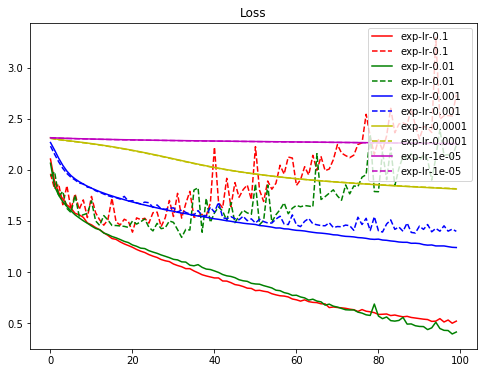

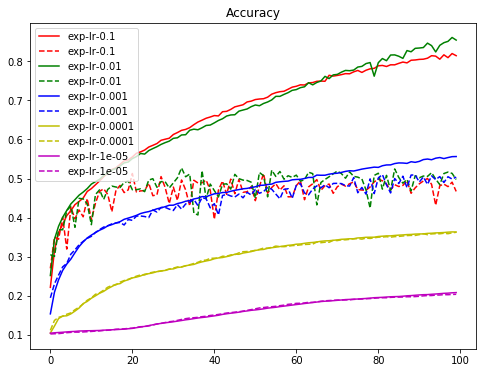

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [17]:
MOMENTUM = 0.35

In [18]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)          

196/196 [==============================] - 4s 19ms/step - loss: 0.8797 - accuracy: 0.6848 - val_loss: 1.8736 - val_accuracy: 0.4338
Epoch 49/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8657 - accuracy: 0.6901 - val_loss: 1.8772 - val_accuracy: 0.4342
Epoch 50/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8526 - accuracy: 0.6927 - val_loss: 1.6471 - val_accuracy: 0.4950
Epoch 51/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8330 - accuracy: 0.6987 - val_loss: 2.0186 - val_accuracy: 0.4377
Epoch 52/100
196/196 [==============================] - 4s 18ms/step - loss: 0.8298 - accuracy: 0.7016 - val_loss: 1.7118 - val_accuracy: 0.4815
Epoch 53/100
196/196 [==============================] - 4s 19ms/step - loss: 0.8177 - accuracy: 0.7038 - val_loss: 1.8031 - val_accuracy: 0.4700
Epoch 54/100
196/196 [==============================] - 4s 18ms/step - loss: 0.7981 - accuracy: 0.7125 - val_loss: 1.6546 - val_accuracy: 0.489

Epoch 1/100
196/196 [==============================] - 4s 19ms/step - loss: 2.1252 - accuracy: 0.2231 - val_loss: 2.0689 - val_accuracy: 0.2410
Epoch 2/100
196/196 [==============================] - 4s 18ms/step - loss: 1.9302 - accuracy: 0.3063 - val_loss: 1.9495 - val_accuracy: 0.3005
Epoch 3/100
196/196 [==============================] - 4s 19ms/step - loss: 1.8467 - accuracy: 0.3407 - val_loss: 1.8370 - val_accuracy: 0.3326
Epoch 4/100
196/196 [==============================] - 4s 19ms/step - loss: 1.7888 - accuracy: 0.3622 - val_loss: 1.7260 - val_accuracy: 0.3877
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 1.7386 - accuracy: 0.3796 - val_loss: 1.7001 - val_accuracy: 0.3905
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 1.6976 - accuracy: 0.3960 - val_loss: 1.6875 - val_accuracy: 0.3983
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 1.6653 - accuracy: 0.4082 - val_loss: 1.6240 - val_accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 1.0429 - accuracy: 0.6307 - val_loss: 1.6660 - val_accuracy: 0.4582
Epoch 58/100
196/196 [==============================] - 4s 19ms/step - loss: 1.0353 - accuracy: 0.6322 - val_loss: 1.4786 - val_accuracy: 0.5004
Epoch 59/100
196/196 [==============================] - 4s 19ms/step - loss: 1.0307 - accuracy: 0.6347 - val_loss: 1.5570 - val_accuracy: 0.4840
Epoch 60/100
196/196 [==============================] - 4s 18ms/step - loss: 1.0191 - accuracy: 0.6377 - val_loss: 1.8130 - val_accuracy: 0.4388
Epoch 61/100
196/196 [==============================] - 4s 19ms/step - loss: 1.0178 - accuracy: 0.6394 - val_loss: 1.6449 - val_accuracy: 0.4606
Epoch 62/100
196/196 [==============================] - 4s 19ms/step - loss: 0.9968 - accuracy: 0.6450 - val_loss: 1.5095 - val_accuracy: 0.5006
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 0.9911 - accuracy: 0.6496 - val_loss: 1.5144 - val_accuracy: 0.497

196/196 [==============================] - 4s 19ms/step - loss: 2.1917 - accuracy: 0.2177 - val_loss: 2.1677 - val_accuracy: 0.2289
Epoch 5/100
196/196 [==============================] - 4s 19ms/step - loss: 2.1442 - accuracy: 0.2347 - val_loss: 2.1192 - val_accuracy: 0.2482
Epoch 6/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0976 - accuracy: 0.2524 - val_loss: 2.0750 - val_accuracy: 0.2628
Epoch 7/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0562 - accuracy: 0.2652 - val_loss: 2.0368 - val_accuracy: 0.2728
Epoch 8/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0215 - accuracy: 0.2759 - val_loss: 2.0066 - val_accuracy: 0.2797
Epoch 9/100
196/196 [==============================] - 4s 18ms/step - loss: 1.9933 - accuracy: 0.2861 - val_loss: 1.9816 - val_accuracy: 0.2906
Epoch 10/100
196/196 [==============================] - 4s 19ms/step - loss: 1.9698 - accuracy: 0.2935 - val_loss: 1.9611 - val_accuracy: 0.2940
Epo

196/196 [==============================] - 4s 19ms/step - loss: 1.5785 - accuracy: 0.4408 - val_loss: 1.5924 - val_accuracy: 0.4350
Epoch 61/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5742 - accuracy: 0.4407 - val_loss: 1.5882 - val_accuracy: 0.4399
Epoch 62/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5702 - accuracy: 0.4417 - val_loss: 1.5800 - val_accuracy: 0.4384
Epoch 63/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5667 - accuracy: 0.4445 - val_loss: 1.5775 - val_accuracy: 0.4391
Epoch 64/100
196/196 [==============================] - 4s 20ms/step - loss: 1.5614 - accuracy: 0.4471 - val_loss: 1.5985 - val_accuracy: 0.4308
Epoch 65/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5569 - accuracy: 0.4475 - val_loss: 1.5792 - val_accuracy: 0.4338
Epoch 66/100
196/196 [==============================] - 4s 19ms/step - loss: 1.5528 - accuracy: 0.4505 - val_loss: 1.5599 - val_accuracy: 0.450

196/196 [==============================] - 4s 19ms/step - loss: 2.2905 - accuracy: 0.1286 - val_loss: 2.2872 - val_accuracy: 0.1301
Epoch 8/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2868 - accuracy: 0.1324 - val_loss: 2.2835 - val_accuracy: 0.1331
Epoch 9/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2831 - accuracy: 0.1352 - val_loss: 2.2800 - val_accuracy: 0.1353
Epoch 10/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2796 - accuracy: 0.1374 - val_loss: 2.2765 - val_accuracy: 0.1378
Epoch 11/100
196/196 [==============================] - 4s 18ms/step - loss: 2.2763 - accuracy: 0.1401 - val_loss: 2.2732 - val_accuracy: 0.1408
Epoch 12/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2730 - accuracy: 0.1428 - val_loss: 2.2700 - val_accuracy: 0.1444
Epoch 13/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2698 - accuracy: 0.1454 - val_loss: 2.2668 - val_accuracy: 0.1491


196/196 [==============================] - 4s 19ms/step - loss: 2.0545 - accuracy: 0.2551 - val_loss: 2.0518 - val_accuracy: 0.2552
Epoch 64/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0506 - accuracy: 0.2577 - val_loss: 2.0478 - val_accuracy: 0.2567
Epoch 65/100
196/196 [==============================] - 4s 18ms/step - loss: 2.0466 - accuracy: 0.2606 - val_loss: 2.0440 - val_accuracy: 0.2587
Epoch 66/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0428 - accuracy: 0.2621 - val_loss: 2.0402 - val_accuracy: 0.2594
Epoch 67/100
196/196 [==============================] - 4s 18ms/step - loss: 2.0390 - accuracy: 0.2659 - val_loss: 2.0365 - val_accuracy: 0.2611
Epoch 68/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0353 - accuracy: 0.2678 - val_loss: 2.0328 - val_accuracy: 0.2648
Epoch 69/100
196/196 [==============================] - 4s 19ms/step - loss: 2.0316 - accuracy: 0.2697 - val_loss: 2.0292 - val_accuracy: 0.267

196/196 [==============================] - 4s 19ms/step - loss: 2.3012 - accuracy: 0.1000 - val_loss: 2.3012 - val_accuracy: 0.1002
Epoch 11/100
196/196 [==============================] - 4s 19ms/step - loss: 2.3006 - accuracy: 0.1000 - val_loss: 2.3006 - val_accuracy: 0.1002
Epoch 12/100
196/196 [==============================] - 4s 19ms/step - loss: 2.3000 - accuracy: 0.1000 - val_loss: 2.3000 - val_accuracy: 0.1002
Epoch 13/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2995 - accuracy: 0.1000 - val_loss: 2.2995 - val_accuracy: 0.1002
Epoch 14/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2989 - accuracy: 0.1000 - val_loss: 2.2989 - val_accuracy: 0.1001
Epoch 15/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2984 - accuracy: 0.1001 - val_loss: 2.2984 - val_accuracy: 0.1001
Epoch 16/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2979 - accuracy: 0.1001 - val_loss: 2.2979 - val_accuracy: 0.100

196/196 [==============================] - 4s 19ms/step - loss: 2.2805 - accuracy: 0.1089 - val_loss: 2.2808 - val_accuracy: 0.1082
Epoch 67/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2802 - accuracy: 0.1094 - val_loss: 2.2804 - val_accuracy: 0.1087
Epoch 68/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2799 - accuracy: 0.1098 - val_loss: 2.2801 - val_accuracy: 0.1095
Epoch 69/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2796 - accuracy: 0.1104 - val_loss: 2.2798 - val_accuracy: 0.1101
Epoch 70/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2793 - accuracy: 0.1107 - val_loss: 2.2795 - val_accuracy: 0.1106
Epoch 71/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2790 - accuracy: 0.1113 - val_loss: 2.2792 - val_accuracy: 0.1114
Epoch 72/100
196/196 [==============================] - 4s 19ms/step - loss: 2.2787 - accuracy: 0.1119 - val_loss: 2.2789 - val_accuracy: 0.112

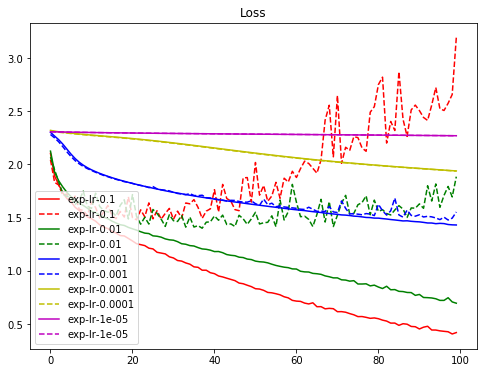

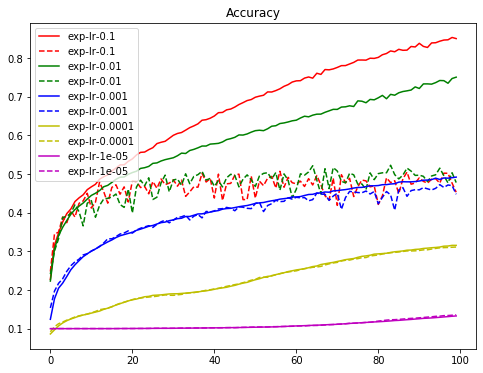

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()